
# **Importing packages**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# **Read IHD-NORMAL data**.

In [ ]:
sheet2=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/All Data Sets/final data-for analysis_for healthdata.xlsx",sheet_name="7304-IHD-normal")
newsheet2=sheet2
newsheet2

,Date,Month,Time,IP No,Sex,Age,Place,AO,LA,RV,...,Imp_ 2,Imp_ 3,Imp_ 4,Imp_ 5,Imp_ 6,Imp_ 7,Imp_ 8,Imp_ 9,Imp_ 10,Imp_ 11
0,2016-08-01 00:00:00,1,11:10:00,1473275,F,18,MANDYA,21.0,23,22,...,NO REGIONAL WALL MOTION ABNORMALITY,"NORMAL LEFT VENTRICLE SYSTOLIC FUNCTION, EF- 6...",TRACE PERICARDIAL EFFUSION SEEN,NO CLOTS / VEGETATION,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-08-01 00:00:00,1,16:16:00,1474255,F,18,HASSAN,NaN,22,14,...,NO REGIONAL WALL MOTION ABNORMALITY,"NORMAL LEFT VENTRICLE SYSTOLIC FUNCTION, EF- 6...",NO CLOTS / VEGETATION / PERICARDIAL EFFUSION,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31-01-2016,1,08:29:00,1441880,M,18,MYSURU,23.0,34,20,...,NO REGIONAL WALL MOTION ABNORMALITY,"NORMAL LEFT VENTRICLE SYSTOLIC FUNCTION, EF- ...",NO CLOTS / VEGETATION / PERICARDIAL EFFUSION,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22-02-2016,2,10:53:00,-1,M,18,AGARTALA,26.0,27,16,...,"NORMAL BIVENTRICULAR FUNCTION, LVEF- 64 %",NO CLOTS / VEGETATION / PERICARDIAL EFFUSION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-06-02 00:00:00,2,13:03:00,1486582,M,18,MYSURU,26.0,21,18,...,NO REGIONAL WALL MOTION ABNORMALITY,"NORMAL LEFT VENTRICLE SYSTOLIC FUNCTION, EF- 5...",NO CLOTS / VEGETATION / PERICARDIAL EFFUSION,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,19-08-2016,8,15:29:00,1578307,M,90,MYSURU,23.0,24,16,...,NO REGIONAL WALL MOTION ABNORMALITY,TRIVIAL TRICUSPID REGURGITATION,"NORMAL LEFT VENTRICLE SYSTOLIC FUNCTION, EF-58...",GRADE I LV DIASTOLIC DYSFUNCTION,NO CLOTS / VEGETATION / PERICARDIAL EFFUSION,NaN,NaN,NaN,NaN,NaN
7300,17-12-2016,12,15:21:00,1636812,M,90,MYSURU,32.0,28,19,...,"NORMAL LEFT VENTRICLE SYSTOLIC FUNCTION, EF- 6...",GRADE I LV DIASTOLIC DYSFUNCTION +,MITRAL ANNULAR CALCIFICATION WITH TRIVIAL MR,SCLEROTIC AVD WITH MILD AR,"MODERATE TR WITH PAH, RVSP 52MMHG",NO CLOTS / VEGETATION / PERICARDIAL EFFUSION,NaN,NaN,NaN,NaN
7301,29-01-2016,1,10:42:00,1483291,M,92,MYSURU,29.0,38,22,...,NO REGIONAL WALL MOTION ABNORMALITY,TRIVIAL MITRAL REGURGITATION,"NORMAL LEFT VENTRICLE SYSTOLIC FUNCTION, EF-60...",LV DIASTOLIC DYSFUNCTION,NO CLOTS / VEGETATION / PERICARDIAL EFFUSION,NaN,NaN,NaN,NaN,NaN
7302,2016-12-04 00:00:00,4,11:42:00,1516291,F,95,HASSAN,22.0,37,19,...,REGIONAL WALL MOTION ABNORMALITY SEEN,MILD MITRAL/ TRIVIAL AORTIC/ MODERATE TRICUSPI...,"DEPRESSED LEFT VENTRICLE SYSTOLIC FUNCTION, EF...",LV DIASTOLIC DYSFUNCTION,MODERATE PULMONARY HYPERTENSION,MINIMAL PERICARDIAL EFFUSION,NO CLOTS / VEGETATION,NaN,NaN,NaN


# **See The Different Columns**.

In [ ]:
newsheet2.columns

Index(['Date', 'Month', 'Time', 'IP No', 'Sex', 'Age', 'Place', 'AO', 'LA',
       'RV', 'L VID_d', 'L VID_s', 'IVS_d', 'IVS_S', 'LVPW_d', 'LVPW_s', 'EDV',
       'ESV', 'SV', 'EF(%)', 'FS(%)', 'MV_E', 'MV_A', 'MR', 'TV_E', 'TV_A',
       'TR', 'AV_VMAX', 'AR', 'PV_VMAX', 'PR', 'Left Ventricle', 'Left Atrium',
       'Right Ventricle', 'Right Atrium', 'Aorta', 'Pulmonary Artery', 'IVS',
       'IAS', 'Mitral valve ', 'Aortic valve', 'Tricuspid valve',
       'pulmonary valve', 'Pericardium', 'Colour Doppler', 'Doppler Study',
       'Other', 'Diagnosis', 'coding', 'Imp_ 1', 'Imp_ 2', 'Imp_ 3', 'Imp_ 4',
       'Imp_ 5', 'Imp_ 6', 'Imp_ 7', 'Imp_ 8', 'Imp_ 9', 'Imp_ 10', 'Imp_ 11'],
      dtype='object')

## **Drop the columns**.

In [ ]:
newsheet2.drop(columns=[ 'AR',  'PR', 'Left Ventricle', 'Left Atrium',
       'Right Ventricle', 'Right Atrium', 'Aorta', 'Pulmonary Artery', 'IVS',
       'IAS', 'Mitral valve ', 'Aortic valve', 'Tricuspid valve',
       'pulmonary valve', 'Pericardium', 'Colour Doppler', 'Doppler Study',
       'Other', 'Imp_ 1', 'Imp_ 2', 'Imp_ 3', 'Imp_ 4',
       'Imp_ 5', 'Imp_ 6', 'Imp_ 7', 'Imp_ 8', 'Imp_ 9', 'Imp_ 10', 'Imp_ 11'],inplace=True)

# **See the column information and its types.**

In [ ]:

newsheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7304 non-null   object 
 1   Month      7304 non-null   int64  
 2   Time       7304 non-null   object 
 3   IP No      7304 non-null   int64  
 4   Sex        7304 non-null   object 
 5   Age        7304 non-null   int64  
 6   Place      7304 non-null   object 
 7   AO         7302 non-null   float64
 8   LA         7304 non-null   int64  
 9   RV         7304 non-null   object 
 10  L VID_d    7303 non-null   float64
 11  L VID_s    7304 non-null   int64  
 12  IVS_d      7299 non-null   float64
 13  IVS_S      7299 non-null   float64
 14  LVPW_d     7301 non-null   float64
 15  LVPW_s     7301 non-null   float64
 16  EDV        7299 non-null   float64
 17  ESV        7298 non-null   float64
 18  SV         7300 non-null   float64
 19  EF(%)      7301 non-null   float64
 20  FS(%)   

# **Find the mean, std, min, max, ect...**

In [ ]:
describe=newsheet2.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
Month,7304.0,6.459885e+00,3.473738,1.0,3.0,7.0,9.0,12.0
IP No,7304.0,1.517440e+06,139761.621396,-1.0,1488204.0,1535274.5,1586062.5,1643615.0
Age,7304.0,5.100657e+01,14.783673,18.0,41.0,52.0,62.0,96.0
AO,7302.0,2.670337e+01,3.371763,16.0,24.0,27.0,29.0,53.0
LA,7304.0,3.017894e+01,4.602316,10.0,27.0,30.0,33.0,61.0
L VID_d,7303.0,4.370231e+01,6.073895,7.0,40.0,44.0,48.0,79.0
L VID_s,7304.0,2.861035e+01,6.092548,5.0,25.0,28.0,31.0,70.0
IVS_d,7299.0,8.883272e+00,2.558029,3.0,8.0,9.0,10.0,90.0
IVS_S,7299.0,1.322496e+01,2.822817,3.0,12.0,13.0,15.0,70.0
LVPW_d,7301.0,8.892480e+00,2.941125,3.0,8.0,9.0,10.0,99.0


## **See the sheet2 null values**.

In [ ]:
newsheet2.isnull().sum()


Date          0
Month         0
Time          0
IP No         0
Sex           0
Age           0
Place         0
AO            2
LA            0
RV            0
L VID_d       1
L VID_s       0
IVS_d         5
IVS_S         5
LVPW_d        3
LVPW_s        3
EDV           5
ESV           6
SV            4
EF(%)         3
FS(%)         9
MV_E         18
MV_A         73
MR            0
TV_E         25
TV_A         50
TR            0
AV_VMAX      26
PV_VMAX      40
Diagnosis     0
coding        0
dtype: int64

# **Drop The Duplicate Values In "IP No"**.

In [ ]:
newsheet2=newsheet2.drop_duplicates(subset='IP No',keep='first', inplace=False, ignore_index=False)

# **Fill the null values**.

In [ ]:
newsheet2.fillna(method='ffill')

,Date,Month,Time,IP No,Sex,Age,Place,AO,LA,RV,...,MV_E,MV_A,MR,TV_E,TV_A,TR,AV_VMAX,PV_VMAX,Diagnosis,coding
0,2016-08-01 00:00:00,1,11:10:00,1473275,F,18,MANDYA,21.0,23,22,...,105.0,56.0,Nil,60.0,33.0,Nil,176.0,149.0,No,0
1,2016-08-01 00:00:00,1,16:16:00,1474255,F,18,HASSAN,21.0,22,14,...,75.0,46.0,Nil,65.0,94.0,Nil,163.0,90.0,No,0
2,31-01-2016,1,08:29:00,1441880,M,18,MYSURU,23.0,34,20,...,57.0,103.0,Nil,41.0,50.0,Nil,112.0,115.0,No,0
3,22-02-2016,2,10:53:00,-1,M,18,AGARTALA,26.0,27,16,...,108.0,62.0,Nil,83.0,51.0,Nil,153.0,158.0,No,0
4,2016-06-02 00:00:00,2,13:03:00,1486582,M,18,MYSURU,26.0,21,18,...,94.0,47.0,Nil,68.0,58.0,Nil,155.0,144.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,19-08-2016,8,15:29:00,1578307,M,90,MYSURU,23.0,24,16,...,47.0,72.0,Nil,48.0,41.0,0.25,78.0,92.0,No,0
7300,17-12-2016,12,15:21:00,1636812,M,90,MYSURU,32.0,28,19,...,39.0,71.0,0.25,37.0,48.0,0.5,130.0,85.0,No,0
7301,29-01-2016,1,10:42:00,1483291,M,92,MYSURU,29.0,38,22,...,41.0,84.0,0.25,38.0,50.0,Nil,115.0,71.0,No,0
7302,2016-12-04 00:00:00,4,11:42:00,1516291,F,95,HASSAN,22.0,37,19,...,77.0,116.0,0.25,41.0,79.0,0.5,174.0,74.0,Yes,1


In [ ]:
newsheet2["AO"]=newsheet2["AO"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["L VID_d"]=newsheet2["L VID_d"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["IVS_d"]=newsheet2["IVS_d"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["IVS_S"]=newsheet2["IVS_S"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["LVPW_d"]=newsheet2["LVPW_d"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["LVPW_s"]=newsheet2["LVPW_s"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["EDV"]=newsheet2["EDV"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["ESV"]=newsheet2["ESV"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["SV"]=newsheet2["SV"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["EF(%)"]=newsheet2["EF(%)"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["FS(%)"]=newsheet2["FS(%)"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["MV_E"]=newsheet2["MV_E"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["MV_A"]=newsheet2["MV_A"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["TV_E"]=newsheet2["TV_E"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["TV_A"]=newsheet2["TV_A"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["AV_VMAX"]=newsheet2["AV_VMAX"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newsheet2["PV_VMAX"]=newsheet2["PV_VMAX"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# **Read The Cleanning Data**.

In [ ]:
cleanesheet2=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/All Data Sets/null.xlsx")

# **See The Null Values**.

In [ ]:
cleanesheet2.isnull().sum()

Unnamed: 0    0
Date          0
Month         0
IP No         0
Sex           0
Age           0
Place         0
AO            0
LA            0
RV            0
L VID_d       0
L VID_s       0
IVS_d         0
IVS_S         0
LVPW_d        0
LVPW_s        0
EDV           0
ESV           0
SV            0
EF(%)         0
FS(%)         0
MV_E          0
MV_A          0
MR            0
TV_E          0
TV_A          0
TR            0
AV_VMAX       0
PV_VMAX       0
Diagnosis     0
coding        0
Day           0
dtype: int64

# **Month Wise Diagnosis Yes Or No In "Male"**.

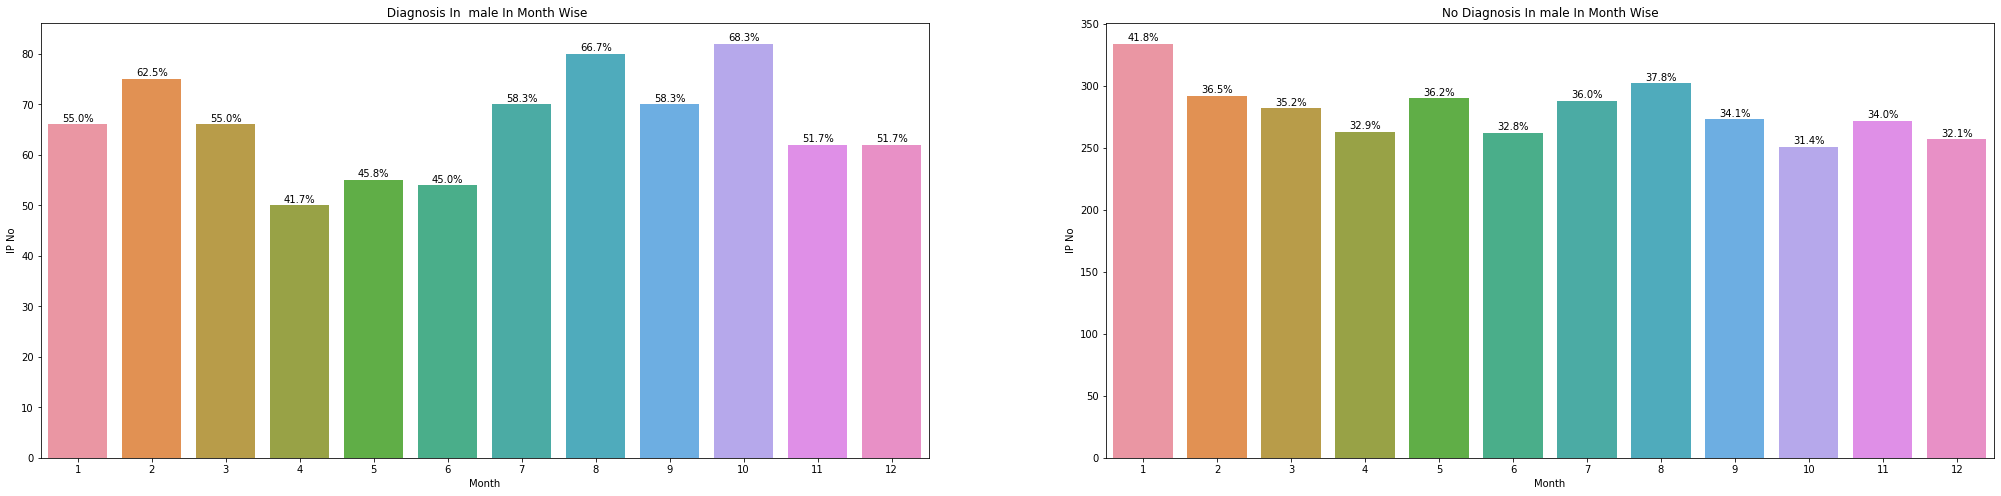

In [ ]:
group1=cleanesheet2[cleanesheet2["Diagnosis"]=="Yes"]
group2=group1[group1["Sex"]=="M"]
group3=group2.groupby(["Month"],as_index=False)["IP No"].count()

group4=cleanesheet2[cleanesheet2["Diagnosis"]=="No"]
group5=group4[group4["Sex"]=="M"]
group6=group5.groupby(["Month"],as_index=False)["IP No"].count()

# plot on month wise
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(35,8))
ax1.set_title(' Diagnosis In  male In Month Wise')
ax=sns.barplot(x="Month",y="IP No",data=group3,ax=ax1)
total = len(group3['Month'])
for p in ax.patches:
    percentage = f'{10 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
ax2.set_title('No Diagnosis In male In Month Wise')
ax=sns.barplot(x="Month",y="IP No",data=group6,ax=ax2)
for p in ax.patches:
    percentage = f'{1.5 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

# **Month Wise Diagnosis Yes Or No In "Female"**.

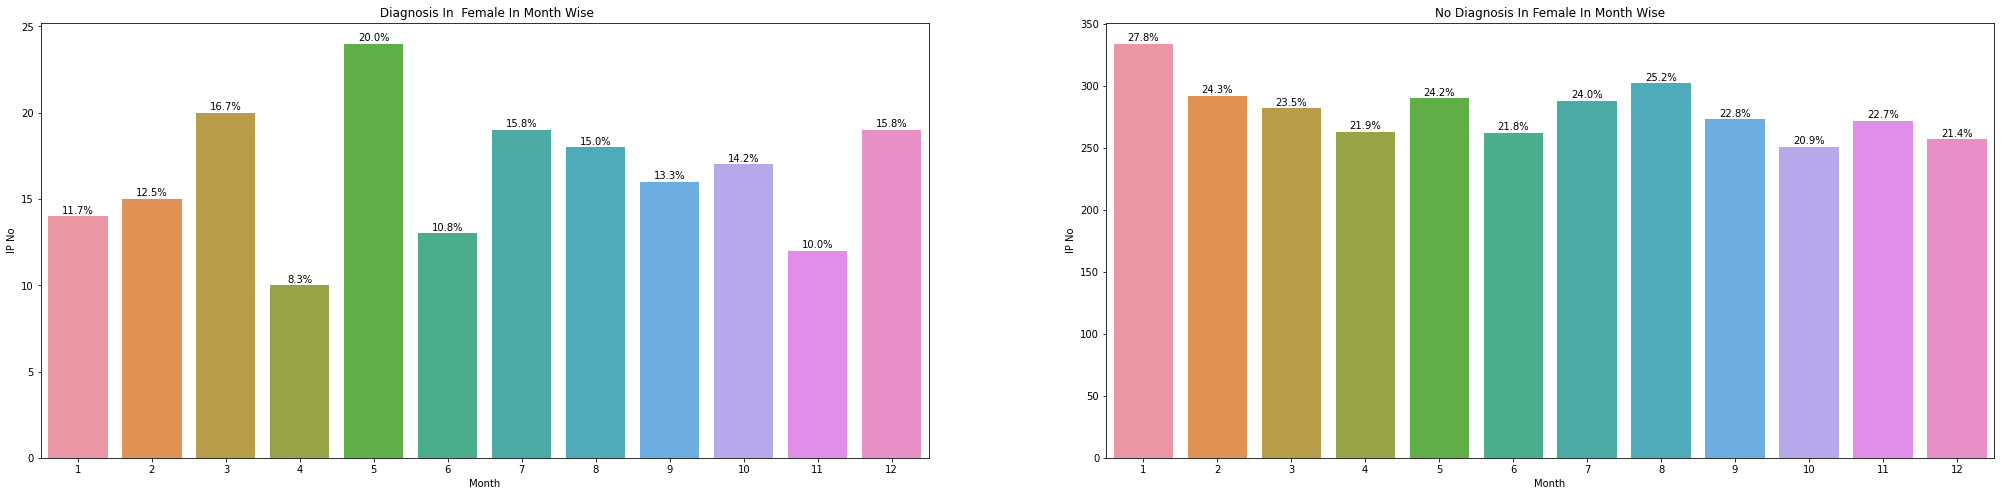

In [ ]:
group7=cleanesheet2[cleanesheet2["Diagnosis"]=="Yes"]
group8=group7[group7["Sex"]=="F"]
group9=group8.groupby(["Month"],as_index=False)["IP No"].count()

group10=cleanesheet2[cleanesheet2["Diagnosis"]=="No"]
group11=group10[group10["Sex"]=="M"]
group12=group11.groupby(["Month"],as_index=False)["IP No"].count()

# plot on month wise
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(35,8))
ax1.set_title(' Diagnosis In  Female In Month Wise')
ax=sns.barplot(x="Month",y="IP No",data=group9,ax=ax1)
total = len(group9['Month'])
for p in ax.patches:
    percentage = f'{10 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
ax2.set_title('No Diagnosis In Female In Month Wise')
ax=sns.barplot(x="Month",y="IP No",data=group12,ax=ax2)
for p in ax.patches:
    percentage = f'{1 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

# **Place Wise Diagnosis Yes Or No In "Male"**.

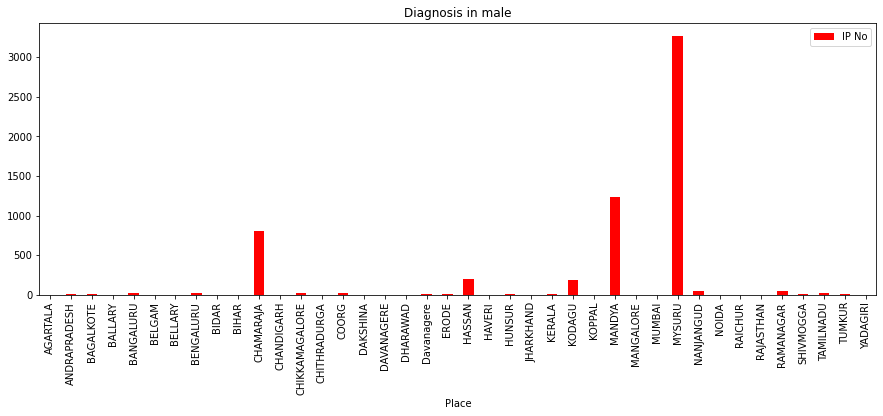

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


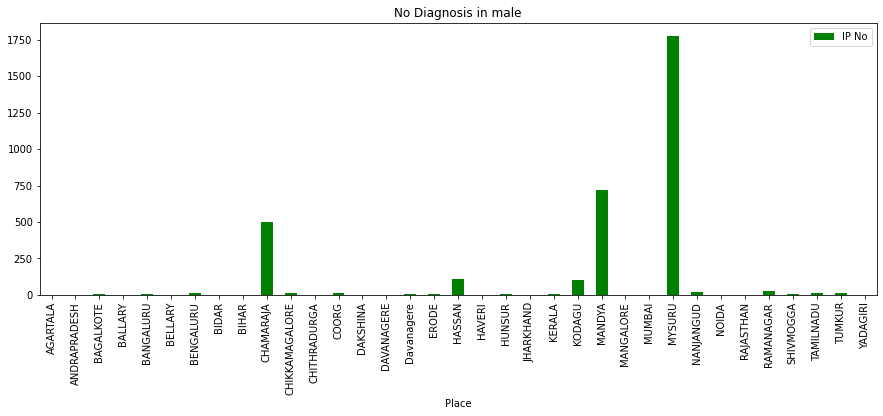

In [ ]:
# plot on Place wise
group13=cleanesheet2[cleanesheet2["Diagnosis"]=="Yes"]
group14=group13[group13["Sex"]=="M"]
group15=group4.groupby(["Place"],as_index=False)["IP No"].count()
group15.plot(x="Place", y=["IP No"], kind="bar",color="r",figsize=(15,5))
plt.title("Diagnosis in male")
plt.show()

group16=cleanesheet2[cleanesheet2["Diagnosis"]=="No"]
group17=group16[group16["Sex"]=="M"]
group18=group17.groupby(["Place"],as_index=False)["IP No"].count()
group18.plot(x="Place", y=["IP No"], kind="bar",color="g",figsize=(15,5))
plt.title("No Diagnosis in male")
plt.subplot()
plt.show()

# **Place Wise Diagnosis Yes Or No In "Female"**.

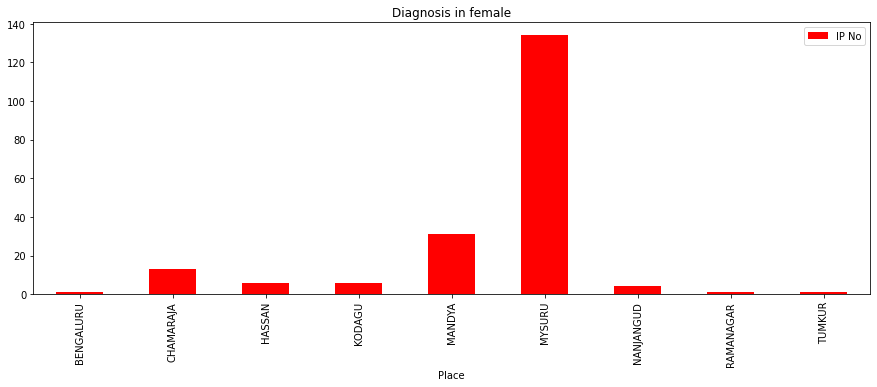

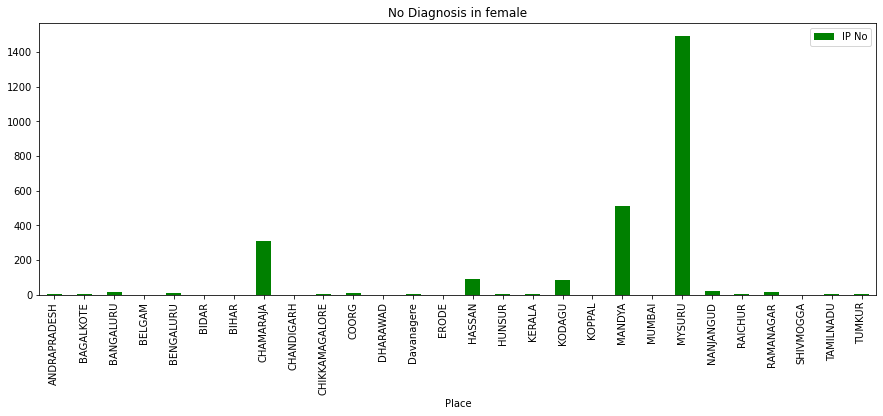

In [ ]:
# plot on place wise
group19=cleanesheet2[cleanesheet2["Diagnosis"]=="Yes"]
group20=group19[group19["Sex"]=="F"]
group21=group20.groupby(["Place"],as_index=False)["IP No"].count()
group21.plot(x="Place", y=["IP No"], kind="bar",color="r",figsize=(15,5))
plt.title("Diagnosis in female")
plt.show()

group22=cleanesheet2[cleanesheet2["Diagnosis"]=="No"]
group23=group22[group22["Sex"]=="F"]
group24=group23.groupby(["Place"],as_index=False)["IP No"].count()
group24.plot(x="Place", y=["IP No"], kind="bar",color="g",figsize=(15,5))
plt.title("No Diagnosis in female")
plt.show()

# **Data Is Being Group On  "Age And Diagnosis" Depends On "IP No"**.

In [ ]:
group25=cleanesheet2.groupby(["Age","Diagnosis"],as_index=False)["IP No"].count()
group25


,Age,Diagnosis,IP No
0,18,No,47
1,19,No,35
2,20,No,57
3,21,No,40
4,22,No,57
...,...,...,...
132,90,No,4
133,90,Yes,1
134,92,No,1
135,95,Yes,1


# **Data Is Being Plot On Age Depends On "IP No"**.

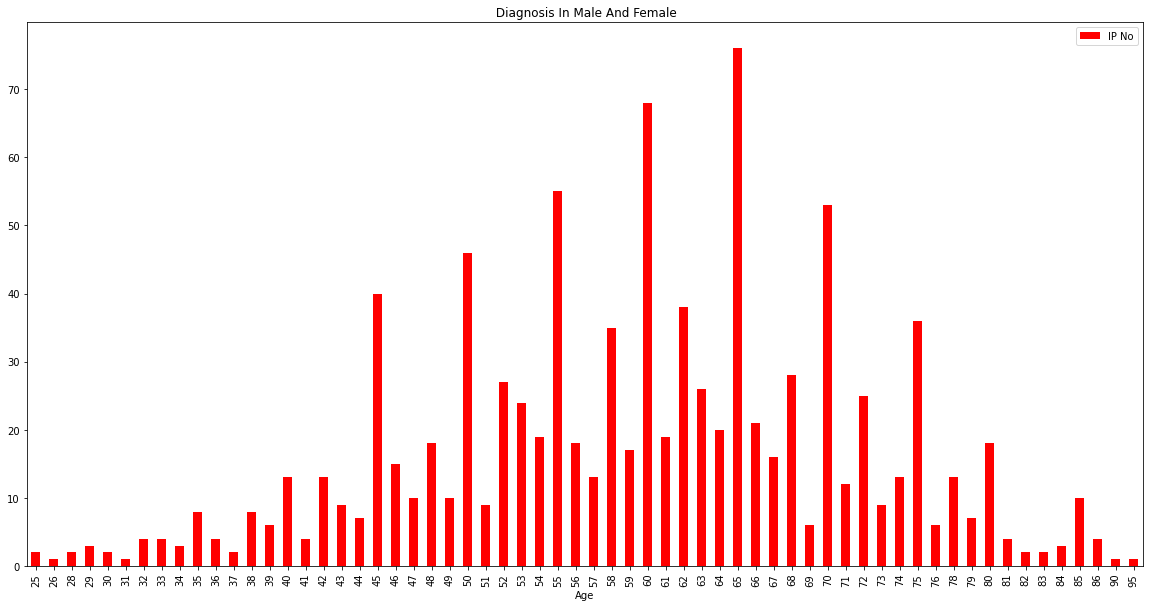

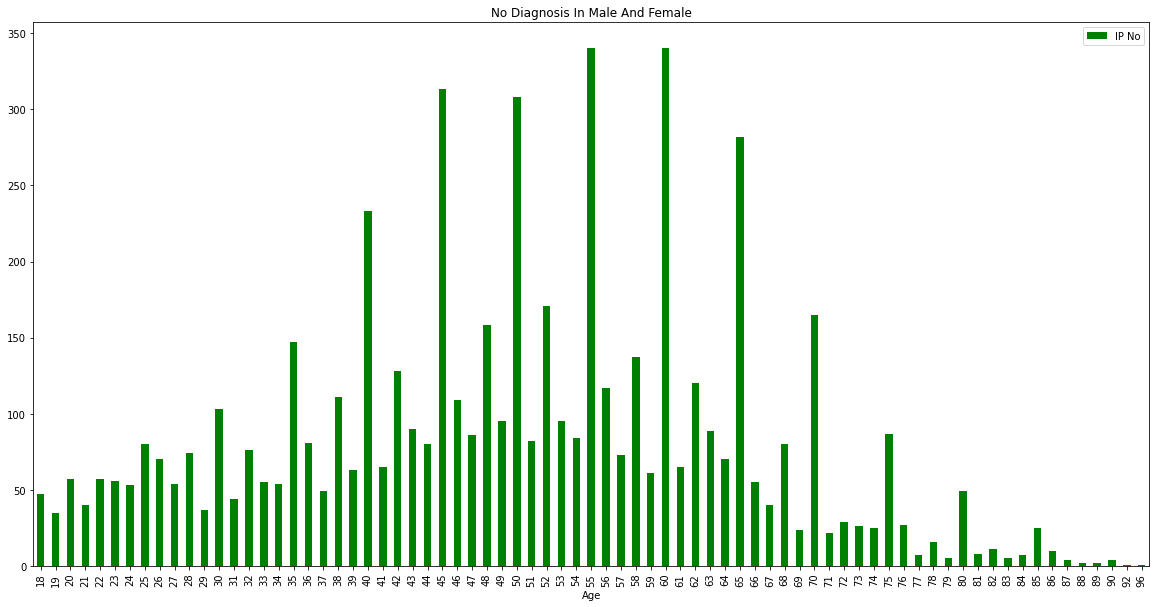

In [ ]:
# plot on age wise
group26=group25[group25["Diagnosis"]=="Yes"]
group26

group26.plot(x="Age", y=["IP No"], kind="bar",color="r",figsize=(20,10))
plt.title(" Diagnosis In Male And Female")
plt.show()

group27=group25[group25["Diagnosis"]=="No"]
group27

group27.plot(x="Age", y=["IP No"], kind="bar",color="g",figsize=(20,10))
plt.title("No Diagnosis In Male And Female")
plt.show()

In [ ]:
cleanesheet2.columns

Index(['Unnamed: 0', 'Date', 'Month', 'IP No', 'Sex', 'Age', 'Place', 'AO',
       'LA', 'RV', 'L VID_d', 'L VID_s', 'IVS_d', 'IVS_S', 'LVPW_d', 'LVPW_s',
       'EDV', 'ESV', 'SV', 'EF(%)', 'FS(%)', 'MV_E', 'MV_A', 'MR', 'TV_E',
       'TV_A', 'TR', 'AV_VMAX', 'PV_VMAX', 'Diagnosis', 'coding', 'Day'],
      dtype='object')

# **I keep the datetime and add a new column for the day and the month.**

In [ ]:
cleanesheet2['Date'] = pd.to_datetime(cleanesheet2.Date)

In [ ]:

cleanesheet2['Day']=cleanesheet2['Date'].map(lambda x:x.day)

In [ ]:
cleanesheet2["Day"].nunique()

31

In [ ]:
cleanesheet2['Month']=cleanesheet2['Date'].map(lambda x:x.month)

In [ ]:
cleanesheet2["Month"]=cleanesheet2["Date"].dt.month_name()

#  **Data Is Being Group On  "Day,Month And Diagnosis" Depends On "IP No"**.

In [ ]:
group28=cleanesheet2.groupby(["Sex","Month","Diagnosis"],as_index=False)["IP No"].count()
group28


,Sex,Month,Diagnosis,IP No
0,F,April,No,223
1,F,April,Yes,12
2,F,August,No,212
3,F,August,Yes,19
4,F,December,No,219
5,F,December,Yes,20
6,F,February,No,257
7,F,February,Yes,17
8,F,January,No,262
9,F,January,Yes,18


# **Diagnosis In Month Wise Filtered**.

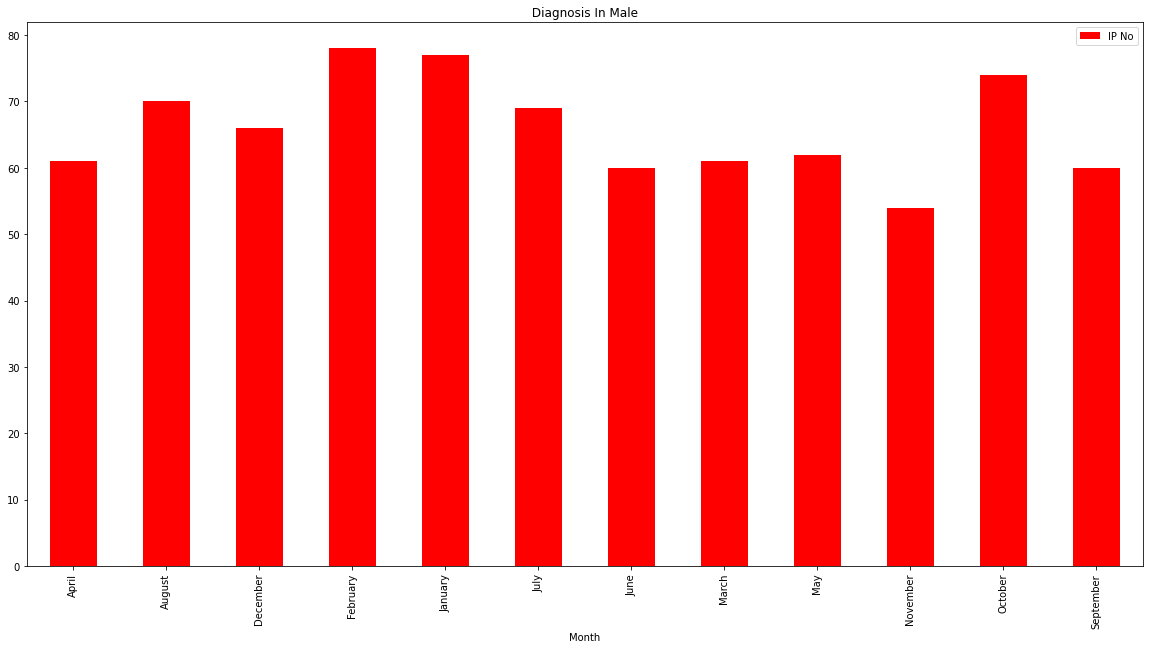

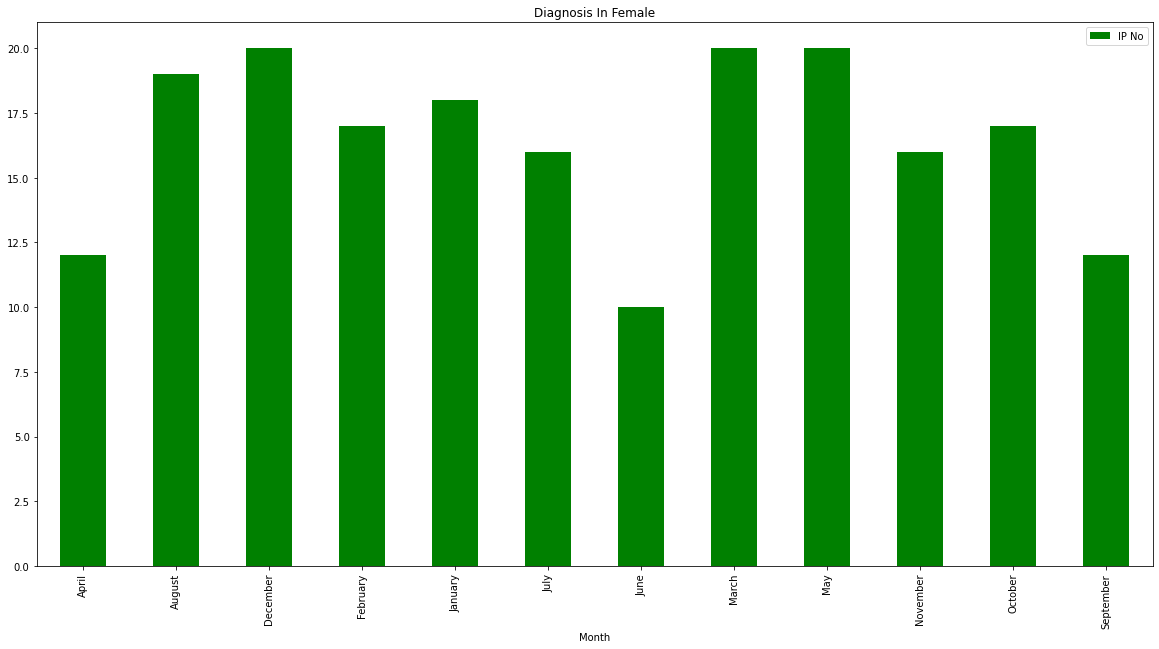

In [ ]:
group29=group28[group28["Diagnosis"]=="Yes"]
group30=group29[group29["Sex"]=="M"]
group30

group30.plot(x="Month", y=["IP No"], kind="bar",color="r",figsize=(20,10))
plt.title(" Diagnosis In Male ")
plt.show()

group31=group29[group29["Sex"]=="F"]
group31.plot(x="Month", y=["IP No"], kind="bar",color="g",figsize=(20,10))
plt.title("Diagnosis In Female")
plt.show()

# **No Diagnosis In Month Wise Filtered**.

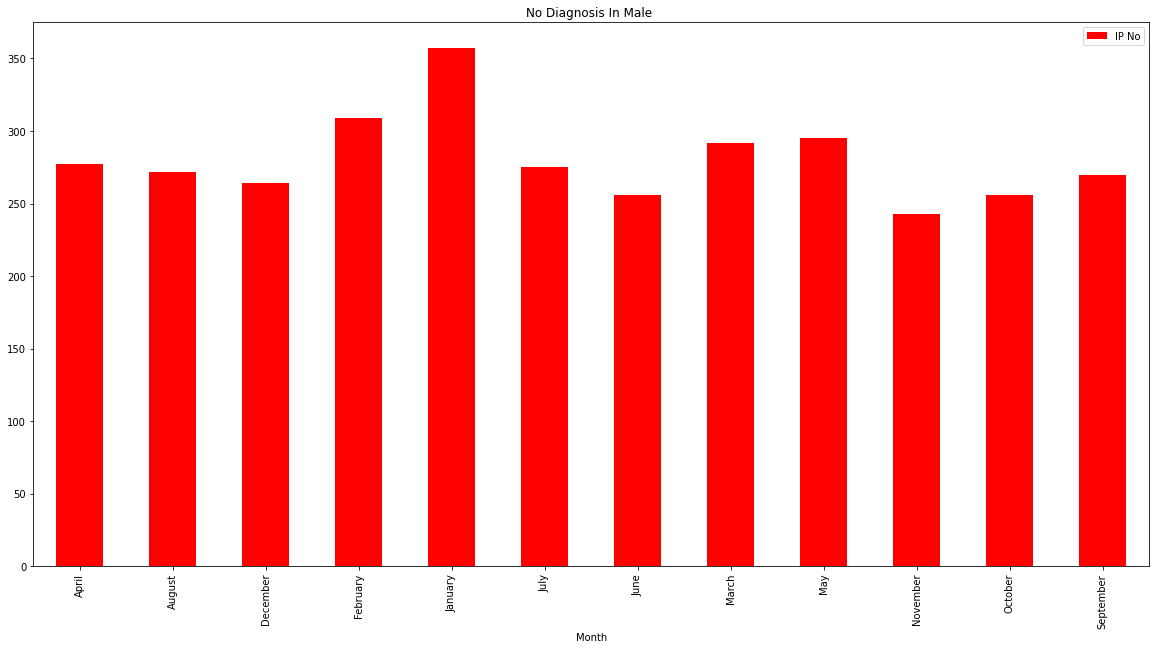

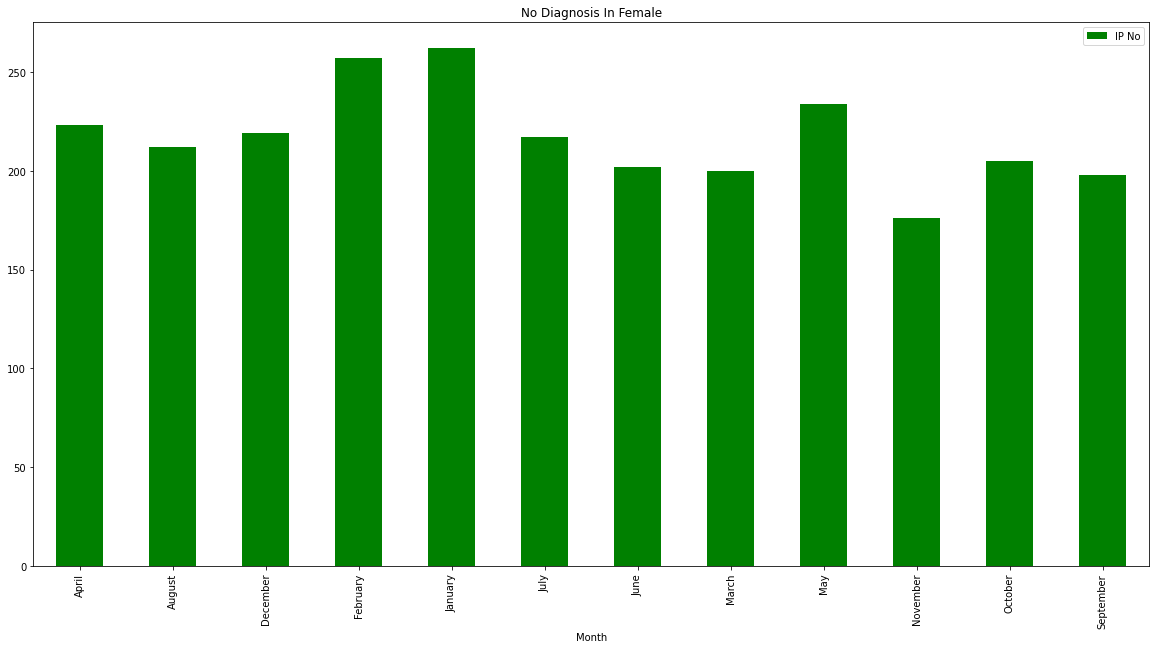

In [ ]:
group32=group28[group28["Diagnosis"]=="No"]
group33=group32[group32["Sex"]=="M"]


group33.plot(x="Month", y=["IP No"], kind="bar",color="r",figsize=(20,10))
plt.title("No Diagnosis In Male ")
plt.show()

group34=group32[group32["Sex"]=="F"]
group34.plot(x="Month", y=["IP No"], kind="bar",color="g",figsize=(20,10))
plt.title("No Diagnosis In Female")
plt.show()

In [ ]:
cleanesheet2

,Unnamed: 0,Date,Month,IP No,Sex,Age,Place,AO,LA,RV,...,MV_A,MR,TV_E,TV_A,TR,AV_VMAX,PV_VMAX,Diagnosis,coding,Day
0,0,2016-08-01,August,1473275,F,18,MANDYA,21,23,22,...,56,0.00,60,33,0.00,176,149,No,0,1
1,1,2016-08-01,August,1474255,F,18,HASSAN,0,22,14,...,46,0.00,65,94,0.00,163,90,No,0,1
2,2,2016-01-31,January,1441880,M,18,MYSURU,23,34,20,...,103,0.00,41,50,0.00,112,115,No,0,31
3,3,2016-02-22,February,-1,M,18,AGARTALA,26,27,16,...,62,0.00,83,51,0.00,153,158,No,0,22
4,4,2016-06-02,June,1486582,M,18,MYSURU,26,21,18,...,47,0.00,68,58,0.00,155,144,No,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,7299,2016-08-19,August,1578307,M,90,MYSURU,23,24,16,...,72,0.00,48,41,0.25,78,92,No,0,19
6956,7300,2016-12-17,December,1636812,M,90,MYSURU,32,28,19,...,71,0.25,37,48,0.50,130,85,No,0,17
6957,7301,2016-01-29,January,1483291,M,92,MYSURU,29,38,22,...,84,0.25,38,50,0.00,115,71,No,0,29
6958,7302,2016-12-04,December,1516291,F,95,HASSAN,22,37,19,...,116,0.25,41,79,0.50,174,74,Yes,1,4


# **Decision Tree Classifier**.

### **1. Categorical variable decision tree.**
##### A categorical variable decision tree includes categorical target variables that are divided into categories. For example, the categories can be yes or no. The categories mean that every stage of the decision process falls into one category, and there are no in-betweens.
### **2. Continuous variable decision tree.**
##### A continuous variable decision tree is a decision tree with a continuous target variable. For example, the income of an individual whose income is unknown can be predicted based on available information such as their occupation, age, and other continuous variables.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
# Drop the columns
cleanesheet_2=cleanesheet2.drop(columns=['Date', 'Month', 'IP No', 'Sex', 'Age','RV','Place', 'EDV', 'ESV', 'SV', 'EDV', 'ESV', 'SV','FS(%)', 'MV_E', 'MV_A', 'MR', 'TV_E',
       'TV_A', 'TR', 'AV_VMAX', 'PV_VMAX', 'Diagnosis', 'coding', 'Day'])


In [ ]:
# export the feature data
cleanesheet_2
cleanesheet_2.to_excel("features.xlsx")

In [ ]:
# load the feature data
features=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/All Data Sets/features.xlsx")
features

,Unnamed: 0,Unnamed: 0.1,AO,LA,L VID_d,L VID_s,IVS_d,IVS_S,LVPW_d,LVPW_s,EF(%)
0,0,0,21,23,41,22,7,8,10,13,60
1,1,1,0,22,37,25,6,10,6,9,60
2,2,2,23,34,48,31,8,10,8,10,60
3,3,3,26,27,49,34,8,11,8,10,64
4,4,4,26,21,44,30,7,13,7,10,58
...,...,...,...,...,...,...,...,...,...,...,...
6955,6955,7299,23,24,30,20,7,11,7,13,58
6956,6956,7300,32,28,33,20,7,10,8,10,60
6957,6957,7301,29,38,40,28,11,13,11,13,60
6958,6958,7302,22,37,48,36,8,10,11,13,35


In [ ]:
# Fix the Target Variable and Features
features=['AO', 'LA', 'L VID_d', 'L VID_s', 'IVS_d', 'IVS_S', 'LVPW_d', 'LVPW_s','EF(%)']
X = cleanesheet_2[features] # Features
y = cleanesheet2.coding # Target variable

In [ ]:
# Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier(max_depth=3)


In [ ]:
# Train Decision Tree Classifer
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Predict the response for test dataset
y_pred = tree.predict(X_test)

# **Find The Accuracy.**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9664750957854407


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1743   33]
 [  37  275]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1776
           1       0.89      0.88      0.89       312

    accuracy                           0.97      2088
   macro avg       0.94      0.93      0.93      2088
weighted avg       0.97      0.97      0.97      2088



In [ ]:
class_name=['AO', 'LA', 'L VID_d', 'L VID_s', 'IVS_d', 'IVS_S', 'LVPW_d', 'LVPW_s','EF(%)']

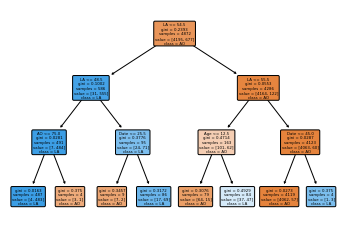

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=tree, feature_names = cleanesheet2.columns, 
                     class_names =class_name , filled = True , precision = 4, rounded = True)

# **Visualising the decision tree graph.**

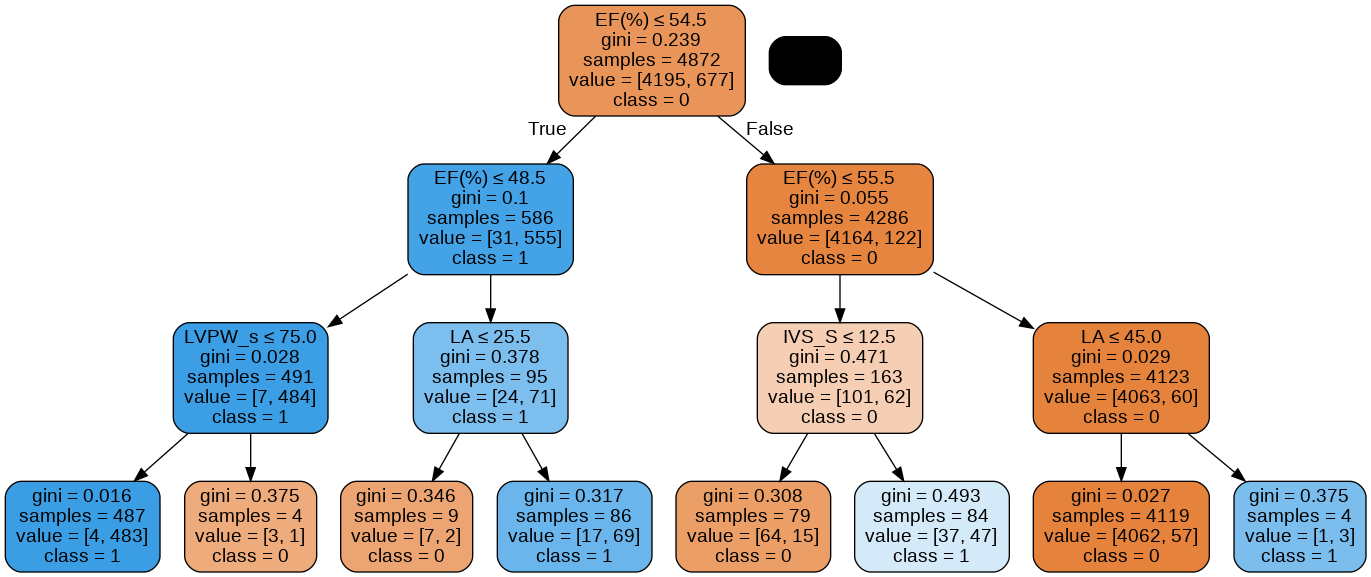

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from sklearn.tree import plot_tree
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

# **Ejection Fraction(EF%).**
### 🔶 High fraction           - above 70%.
### 🔶 Normal fraction         - 55% - 70%.
### 🔶 Low fraction            - 40% - 55%.
### 🔶 Possible heart failure  - below 40%.
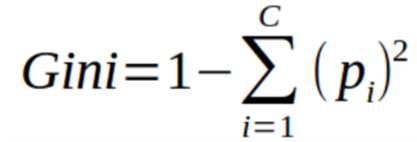

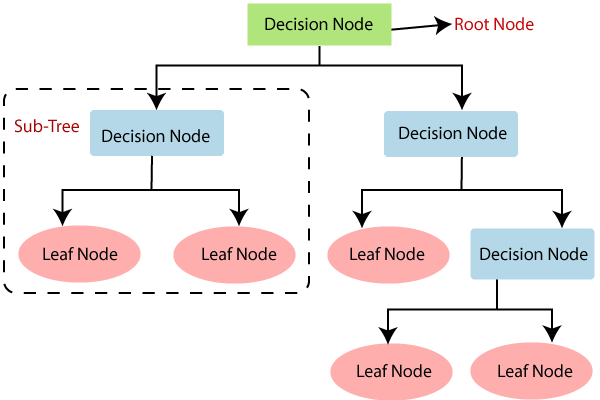